In [1]:
!uv pip install langgraph

Using Python 3.11.10 environment at: /home/ubu/Documents/work/l4t/langchain-langgraph-python/.venv
Audited 1 package in 5ms


In [2]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict, Annotated
from IPython.display import Image, display

In [3]:
class State(TypedDict):
    input: str
    output: str

graph = StateGraph(State)

def reversal_node(state: State) -> State:
    result = state["input"][::-1]
    return {"output": result}

def display_node(state: State) -> None:
    print(f"Reversed text is {state['output']}")


graph.add_node("reversal_node", reversal_node)
graph.add_node("display_node", display_node)

graph.add_edge(START, "reversal_node")
graph.add_edge("reversal_node", "display_node")
graph.add_edge("display_node", END)

compiled_graph = graph.compile()

compiled_graph.invoke({"input": "Hey! I am original string."})

Reversed text is .gnirts lanigiro ma I !yeH


{'input': 'Hey! I am original string.', 'output': '.gnirts lanigiro ma I !yeH'}

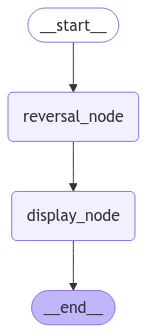

In [4]:

try:
    display(Image(compiled_graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass